In [1]:
import os
os. getcwd()

'/Users/hanatihailati/Downloads/Python Book'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
%matplotlib inline
from datetime import datetime
import baostock as bs

In [3]:
df = pd.read_excel (r'/Users/hanatihailati/Downloads/Python Book/Carbon time series analysis.xlsx', 
                    sheet_name='Sheet1', index_col = 0, parse_dates = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645 entries, 2022-03-27 to 2009-10-18
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon Emissions Futures   645 non-null    float64
 1   Brent Oil Futures          645 non-null    float64
 2   Natural Gas Futures        645 non-null    float64
 3   DJ Commodity Energy Index  404 non-null    float64
 4   SPX                        645 non-null    float64
 5   Euro Stoxx 50              645 non-null    float64
dtypes: float64(6)
memory usage: 35.3 KB


In [5]:
df.describe()

,Carbon Emissions Futures,Brent Oil Futures,Natural Gas Futures,DJ Commodity Energy Index,SPX,Euro Stoxx 50
count,645.000000,645.000000,645.000000,404.000000,645.000000,645.000000
mean,17.471070,76.689891,3.283989,89.215173,2295.916636,3166.426264
std,16.670466,25.745369,0.913554,23.827405,939.515052,483.087013
min,3.920000,21.440000,1.495000,34.717600,1022.580000,2026.030000
25%,6.750000,55.620000,2.650000,72.899425,1465.770000,2833.060000
50%,11.100000,72.610000,3.044000,86.444550,2091.580000,3164.210000
75%,22.180000,105.020000,3.931000,101.189725,2830.710000,3495.190000
max,96.430000,126.650000,6.135000,187.466800,4766.180000,4370.330000


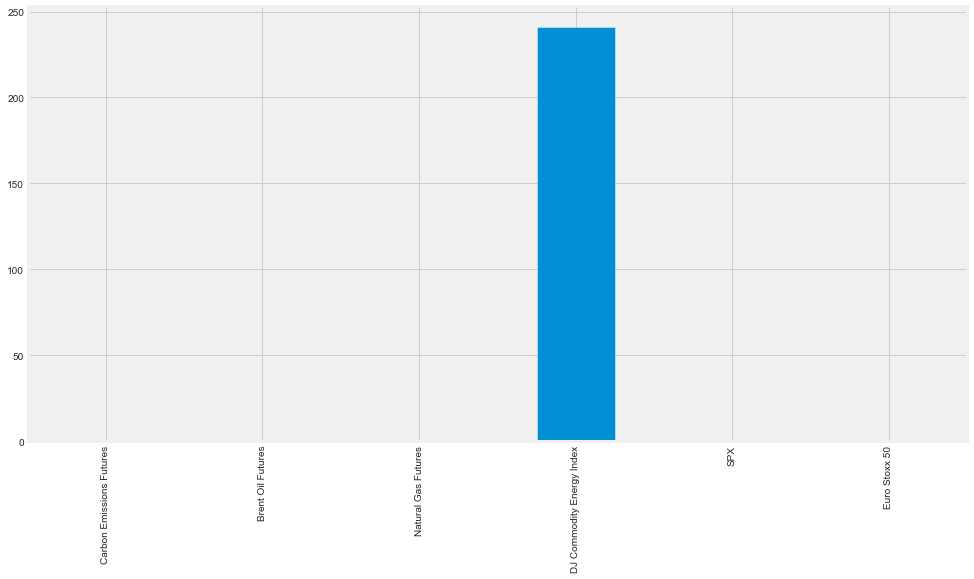

In [6]:
# df_missing_count
df_missing_count = df.isnull().sum()
plt.rcParams['figure.figsize'] = (15, 8)
df_missing_count.plot.bar()
plt.show()

In [7]:
# shift(1).rolling(window = 3) moving average
df['Carbon 3D MA'] = df['Carbon Emissions Futures'].shift(1).rolling(window = 3).mean()
df['Carbon 10D MA'] = df['Carbon Emissions Futures'].shift(1).rolling(window = 10).mean()
df['Carbon 30D MA'] = df['Carbon Emissions Futures'].shift(1).rolling(window = 30).mean()

In [8]:
# pct_change() absolute price change
df['Carbon dailyreturn'] = df['Carbon Emissions Futures'].pct_change()
df['SPX dailyreturn'] = df['SPX'].pct_change()
df['Oil dailyreturn'] = df['Brent Oil Futures'].pct_change()
df['EuroStoxx dailyreturn'] = df['Euro Stoxx 50'].pct_change()
df['Natural Gas dailyreturn'] = df['Natural Gas Futures'].pct_change()
df['Energy Index dailyreturn'] = df['DJ Commodity Energy Index'].pct_change()

<AxesSubplot:xlabel='Date'>

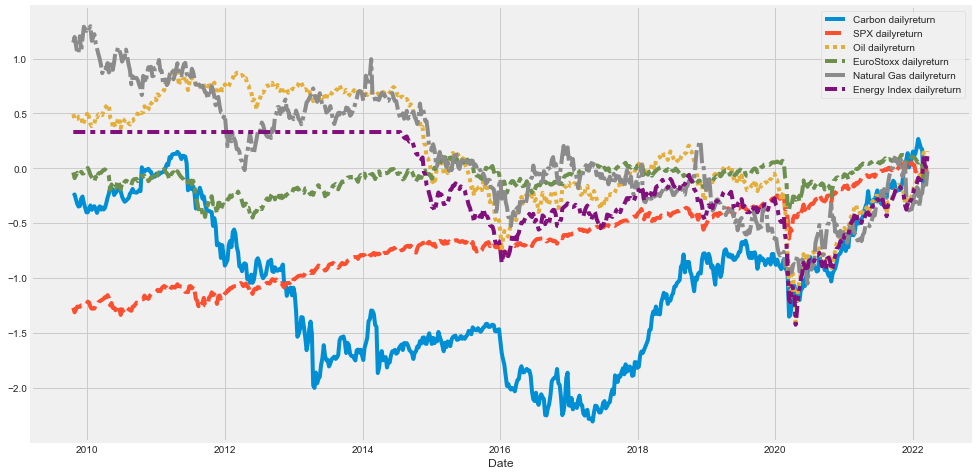

In [12]:
# sns.lineplot()multi securities prive move
sns.lineplot(data = df[['Carbon dailyreturn', 'SPX dailyreturn','Oil dailyreturn', 'EuroStoxx dailyreturn',
                        'Natural Gas dailyreturn', 'Energy Index dailyreturn'  ]].cumsum())

<AxesSubplot:>

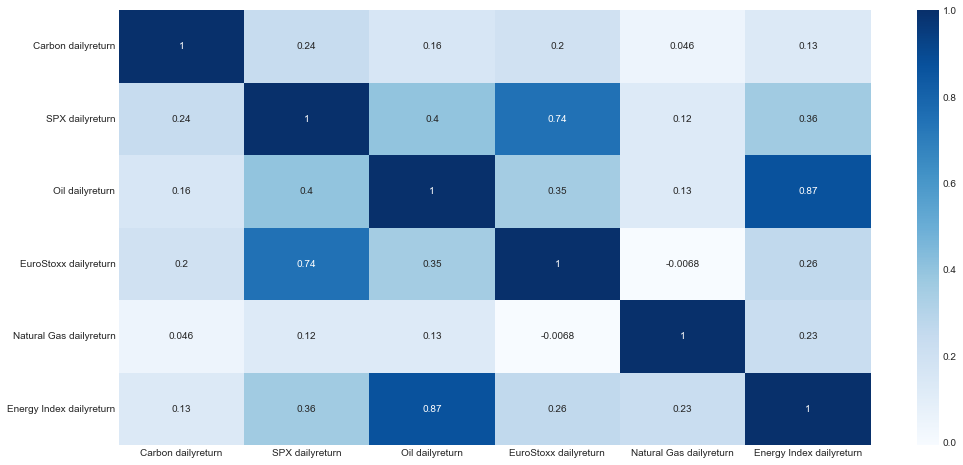

In [13]:
# heatmap.corr()security correlation matrix method 1 (straight forward)
sns.heatmap(df[['Carbon dailyreturn', 'SPX dailyreturn','Oil dailyreturn', 'EuroStoxx dailyreturn',
                        'Natural Gas dailyreturn', 'Energy Index dailyreturn'  ]].corr(), 
            annot=True, cmap='Blues')

<AxesSubplot:>

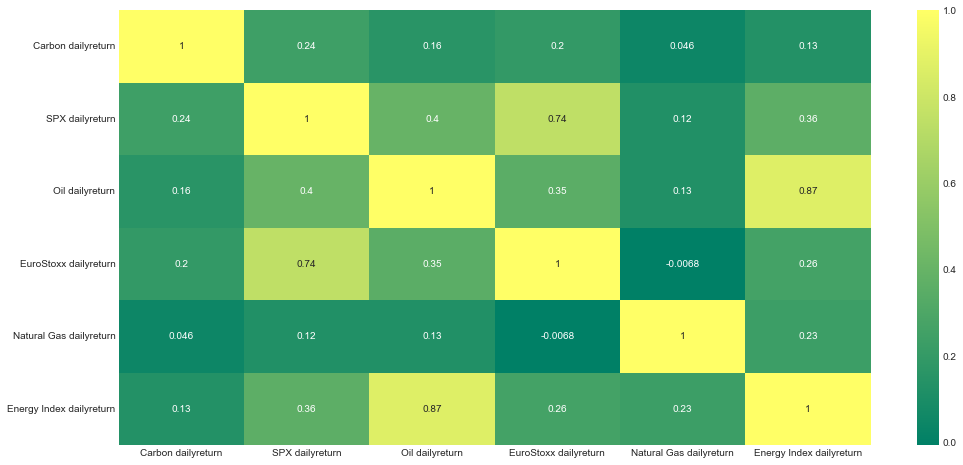

In [15]:
# heatmap.corr()security correlation matrix method 2 (with amendable attributions)
cmap = sns.diverging_palette( 220, 10, as_cmap= True)
sns.heatmap(df[['Carbon dailyreturn', 'SPX dailyreturn','Oil dailyreturn', 'EuroStoxx dailyreturn',
                        'Natural Gas dailyreturn', 'Energy Index dailyreturn'
               ]].iloc[:df.shape[0]].corr(),annot = True, cmap = 'summer')

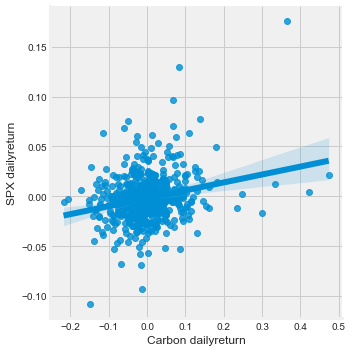

In [16]:
# sns.lmplot()ploting 2 securities for correlation with confidence interval, method 1 (straight forward)
sns.lmplot( x = 'Carbon dailyreturn', y = 'SPX dailyreturn', data = df)

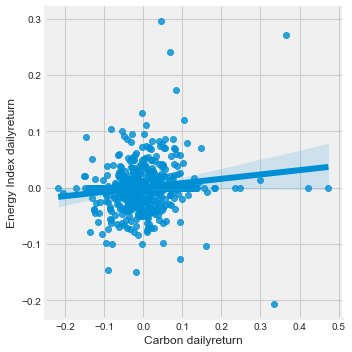

In [17]:
sns.lmplot( x = 'Carbon dailyreturn', y = 'Energy Index dailyreturn', data = df)

<AxesSubplot:xlabel='Carbon dailyreturn', ylabel='SPX dailyreturn'>

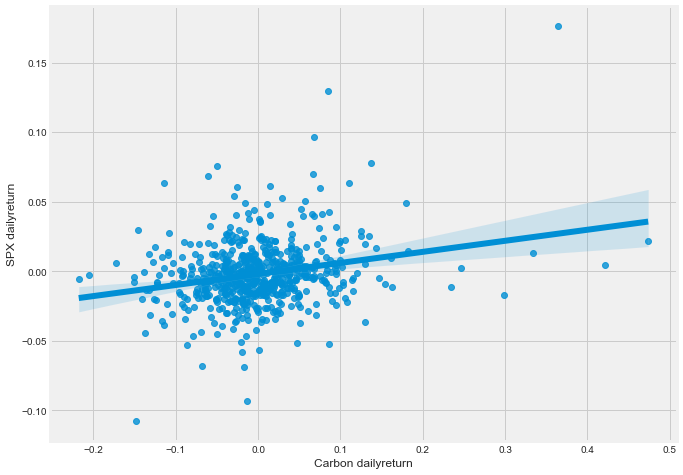

In [18]:
# sns.regplt()ploting 2 securities for correlation with confidence interval, method 2 (with amendable attributions)
f, ax = plt.subplots(figsize = (10, 8))
sns.regplot(x = 'Carbon dailyreturn',
           y = 'SPX dailyreturn',
           data = df,
           fit_reg=True, # True，for adding correlation fitted line for x & y
           ci = 95, # setting confidence interval a
           scatter = True, # Ture, for scattered plot
           ax=ax)

<AxesSubplot:xlabel='Carbon dailyreturn', ylabel='SPX dailyreturn'>

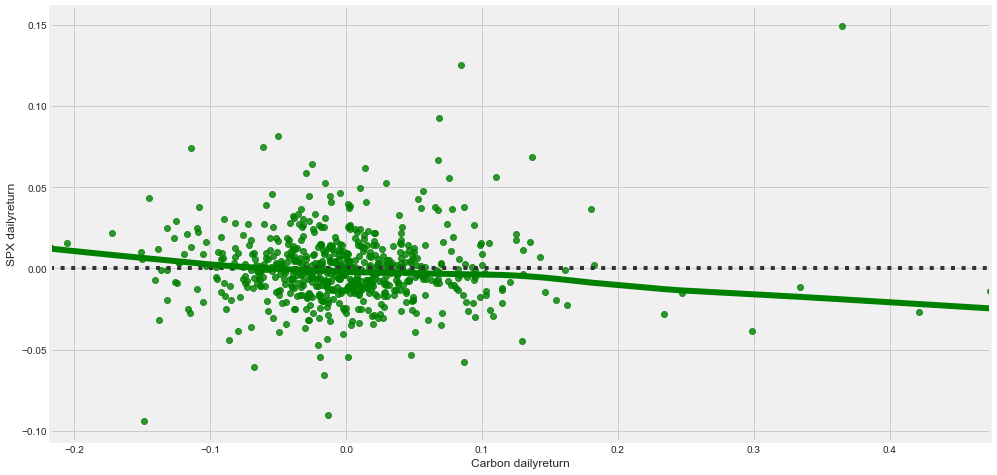

In [19]:
# sns.residplot()residue plot, for fitness check of regression
x = df['Carbon dailyreturn']
y = df['SPX dailyreturn']
sns.residplot(x = x, y = y, lowess = True, color = 'g')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


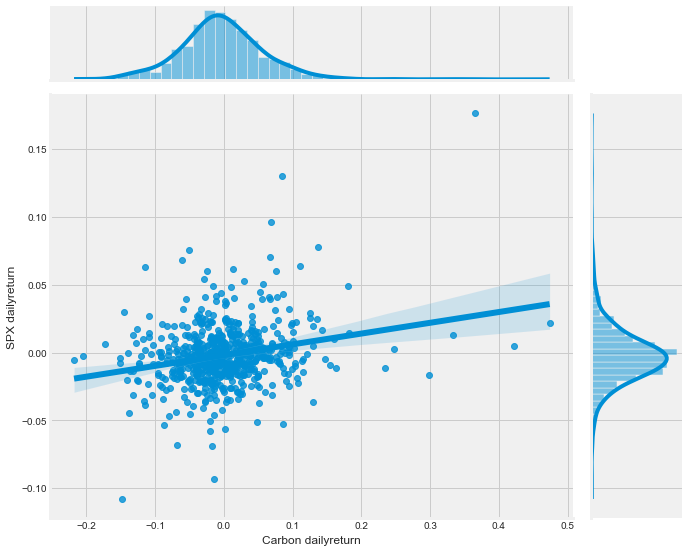

In [22]:
# sns.jointplot()for two securities correlations with fitted line, CI, scatter plots

# sns.jointplot
gird = sns.jointplot('Carbon dailyreturn', 'SPX dailyreturn', data = df, kind = 'reg')
gird.fig.set_figwidth(10)
gird.fig.set_figheight(8)

# kind="reg" or kind="scatter"

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

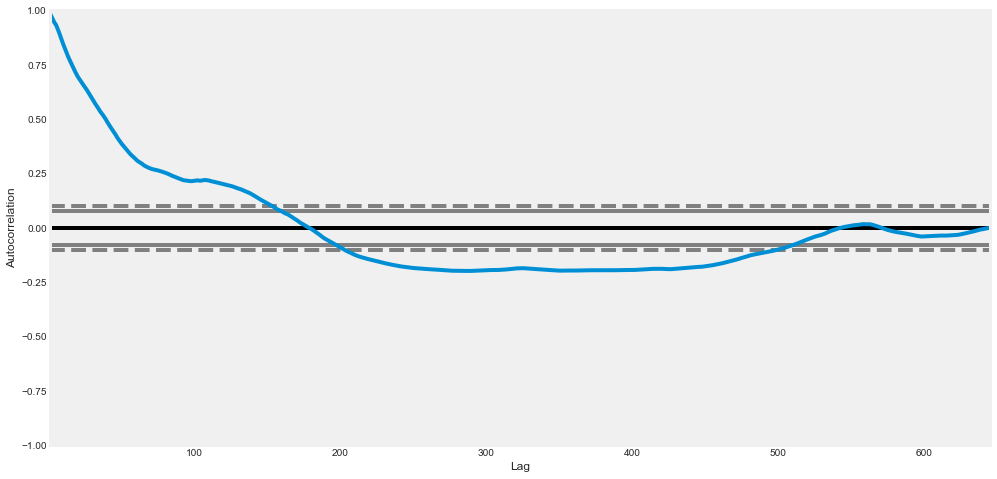

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Carbon Emissions Futures'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


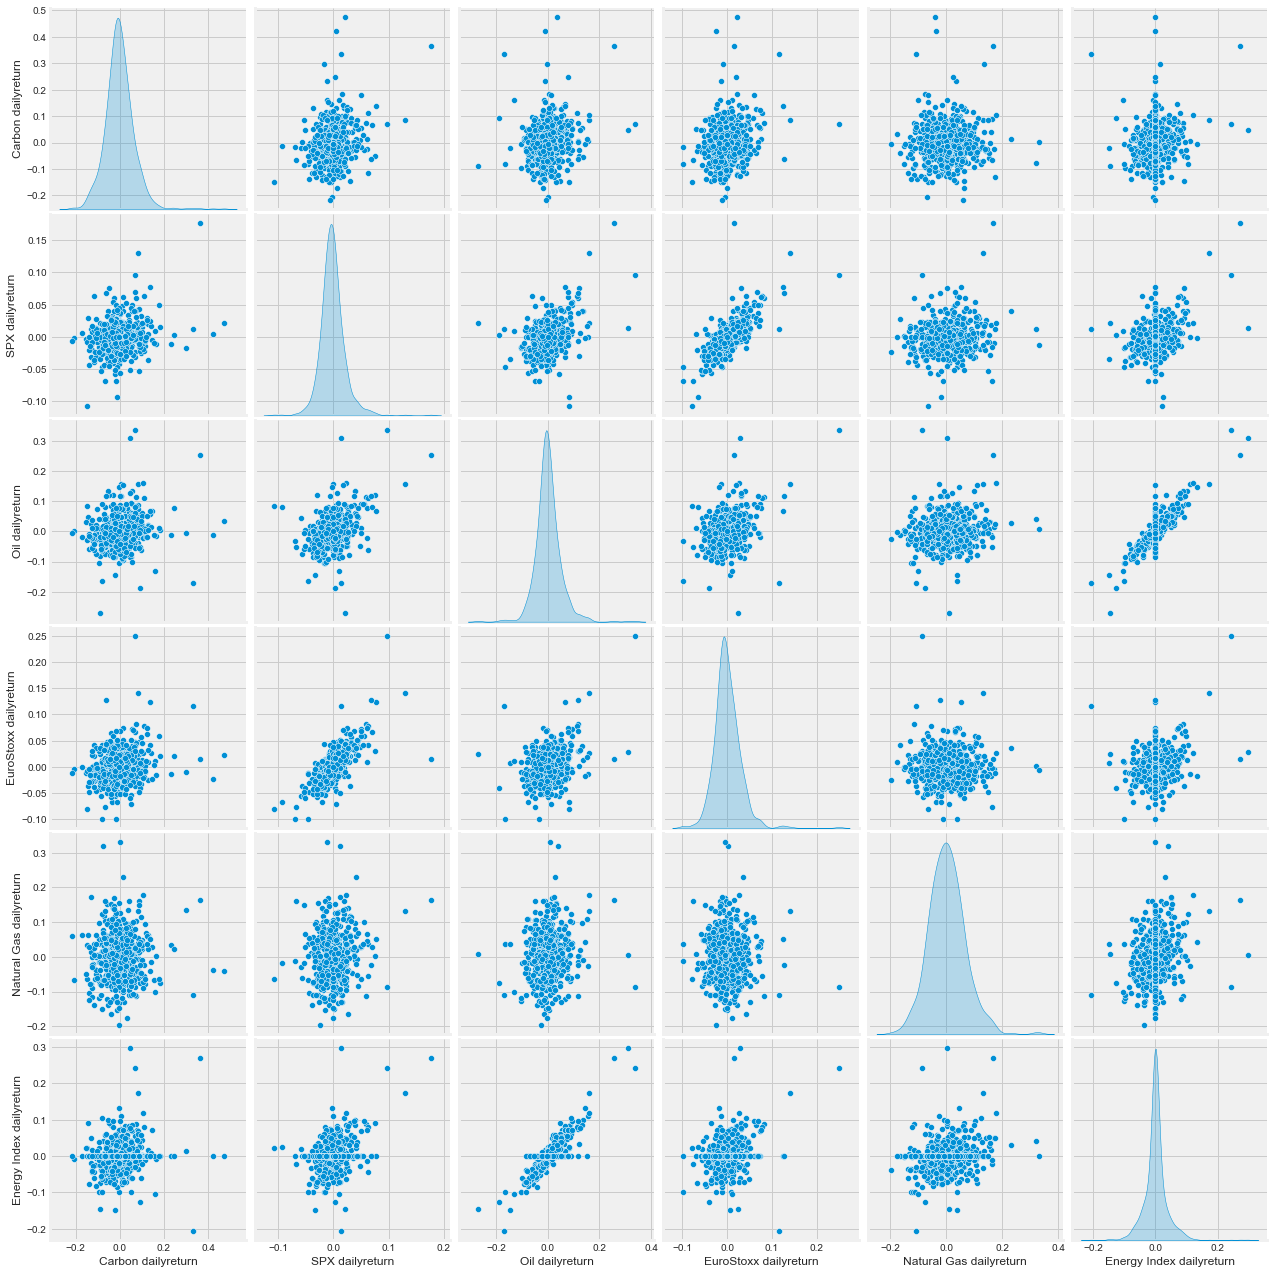

In [23]:
# sns.pairplot()for multi securities plotting
sns.pairplot(df[['Carbon dailyreturn', 'SPX dailyreturn','Oil dailyreturn', 'EuroStoxx dailyreturn',
                        'Natural Gas dailyreturn', 'Energy Index dailyreturn'
               ]], size = 3, diag_kind = 'kde')

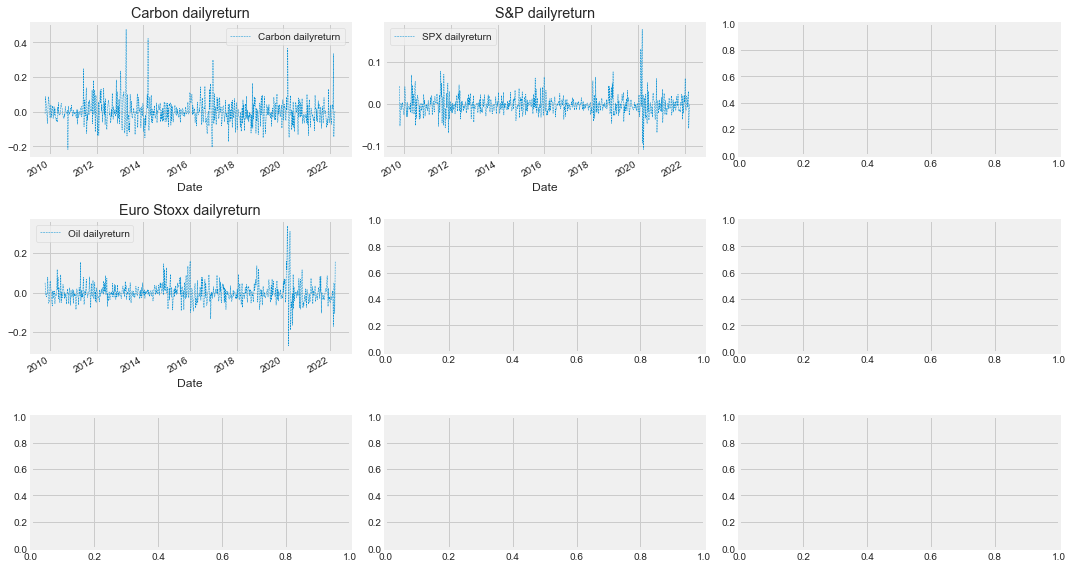

In [24]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.set_figheight(8)
fig.set_figwidth(15)

df['Carbon dailyreturn'].plot(ax = axes[0,0], legend = True, linestyle = '--', linewidth=0.5)
axes[0,0].set_title('Carbon dailyreturn')

df['SPX dailyreturn'].plot(ax = axes[0,1], legend = True, linestyle = '--', linewidth=0.5)
axes[0,1].set_title('SPX dailyreturn')

df['Oil dailyreturn'].plot(ax = axes[1,0], legend = True, linestyle = '--', linewidth=0.5)
axes[1,0].set_title('Euro Stoxx dailyreturn')

fig.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

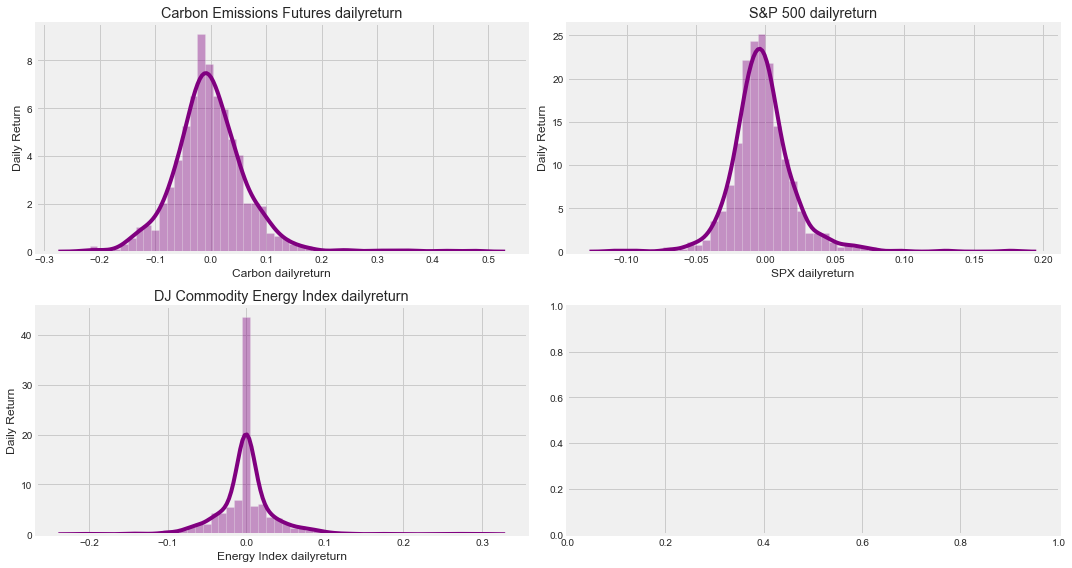

In [25]:
fig, axes = plt.subplots(nrows = 2, ncols =2)
fig.set_figheight(8)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
sns.distplot(df['Carbon dailyreturn'].dropna(), bins=50, color='purple')
plt.ylabel('Daily Return')
plt.title('Carbon Emissions Futures dailyreturn')

plt.subplot(2, 2, 2)
sns.distplot(df['SPX dailyreturn'].dropna(), bins=50, color='purple')
plt.ylabel('Daily Return')
plt.title('S&P 500 dailyreturn')

plt.subplot(2, 2, 3)
sns.distplot(df['Energy Index dailyreturn'].dropna(), bins=50, color='purple')
plt.ylabel('Daily Return')
plt.title('DJ Commodity Energy Index dailyreturn')

fig.tight_layout()

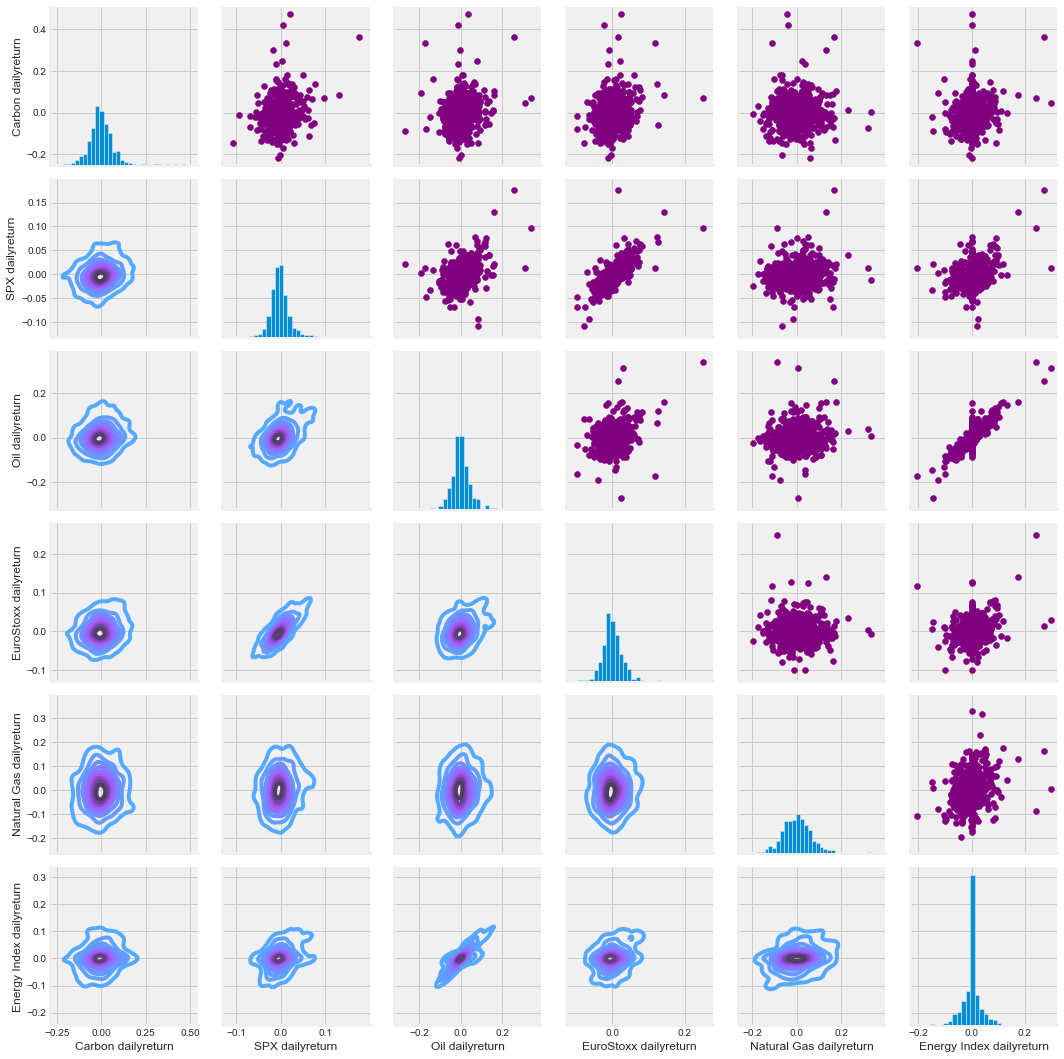

In [27]:
# sns.PairGrid for multi securities ploting multi charts
return_fig = sns.PairGrid(df[['Carbon dailyreturn', 'SPX dailyreturn','Oil dailyreturn', 'EuroStoxx dailyreturn',
                        'Natural Gas dailyreturn', 'Energy Index dailyreturn'
               ]].dropna())
return_fig.map_upper(plt.scatter, color = 'purple')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

Text(0, 0.5, 'Volatility')

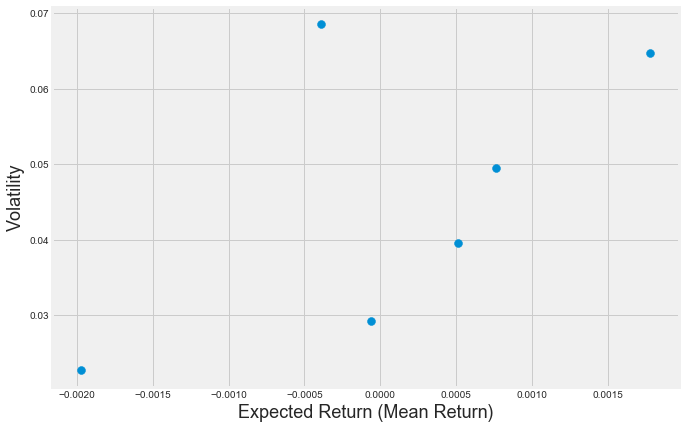

In [26]:
rets = df[['Carbon dailyreturn', 'SPX dailyreturn','Oil dailyreturn', 'EuroStoxx dailyreturn',
                        'Natural Gas dailyreturn', 'Energy Index dailyreturn'
               ]].dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return (Mean Return)',fontsize=18)
plt.ylabel('Volatility',fontsize=18)